**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras almacenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [1]:
#configuración del laboratorio
# Ejecuta esta celda!
%load_ext autoreload
%autoreload 2
# for local 
# import sys ; sys.path.append('../commons/utils/')
!wget https://raw.githubusercontent.com/jdariasl/ML_2020/master/Labs/commons/utils/general.py -O general.py --no-cache
from general import configure_lab3
configure_lab3()
from lab3 import *
GRADER = part_1()

--2021-05-13 20:32:38--  https://raw.githubusercontent.com/jdariasl/ML_2020/master/Labs/commons/utils/general.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14633 (14K) [text/plain]
Saving to: ‘general.py’

general.py          100%[===================>]  14.29K  --.-KB/s    in 0.001s  

2021-05-13 20:32:38 (24.7 MB/s) - ‘general.py’ saved [14633/14633]

lab configuration started
installing libraries
downloading files
lab configured


# Laboratorio 3 - Parte 1. Comparación de metodos de clusterización

### Ejercicio 1: Contextualización del problema

A continuación se leen los datos de un problema de clasificación. El problema corresponde a la clasificación de dígitos escritos a mano. Los datos fueron preprocesados para reducir el número de características y solo se van usar los digitos 0 al 4. La técnica usada será analizada más adelante en el curso. Al ejecutar la celda de código, tambien se podra visualizar una muestra de los datos usados.

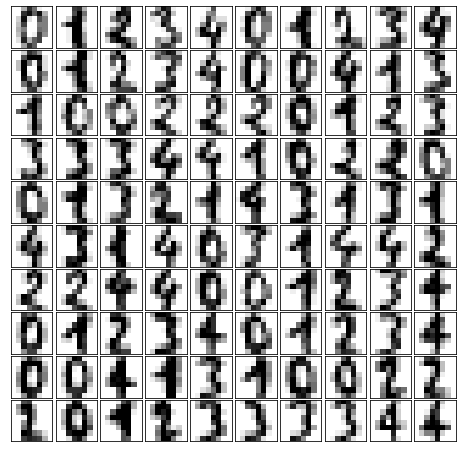

In [2]:
digits = load_digits(n_class=5)
#--------- preprocesamiento--------------------
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
#---------- Datos a usar ----------------------
x = data
y = digits.target

plot_digits(digits.data)

[texto del vínculo](https:// [texto del vínculo](https://))Vamos realizar algunas pruebas para determinar que metodologia de validación es más adecuada. En el ejercicio de código, vamos usar las librerias de scikit-learn:
1. [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html?highlight=stratifiedkfold#sklearn.model_selection.StratifiedKFold)
1. [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold)

En la función debes seleccionar la función de sklearn adecuada para lograr el efecto deseado y completar el código donde es señalado

In [ ]:
#ejercicio de código
def get_muestras_by_cv (X, Y, method):
    """función que devuelve el numero de muestras promedios
    dependiendo de la metodologia de validación (method).
    los conjuntos de datos deben dividirse **4 veces**
    X: matriz numpy con los valores de las caracteristicas
    Y: vector numpy con las etiquetas de con conjunto de caracteriticas X
    method (int): solo puede tomar dos valores:
        1: se debe usar el metodo de validación Bootstrapping
        2: se debe usar el metodo valicacion cruzada estratificada
    retorna: dataframe con las siguientes columnas:
        - etiqueta de clase
        - fold
        - # muestras en entrenamiento
    """
    
    idx = 0
    results = pd.DataFrame()
    
    if method == 1:
        #completa el codigo con el metodo adecuado
        cv = KFold(n_splits=4) 
        cv.get_n_splits(X)  
        for n, (train_index, test_index) in enumerate (cv.split(X)):
            y_train, y_test = Y[train_index], Y[test_index]
            
            # iterar sobre las etiquetas
            for label in np.unique(y_train):
                results.loc[idx, 'etiqueta de clase'] = label
                results.loc[idx, 'folds'] = n
                results.loc[idx, 'numero de muestras entrenamiento'] = (y_train == label).sum()
                idx = idx+1
        
    elif method == 2:
        #completa el codigo con el metodo adecuado
        cv = StratifiedKFold(n_splits=4)
        cv.get_n_splits(X, Y)
        for n, (train_index, test_index ) in enumerate (cv.split(X,Y)):
            y_train, y_test = Y[train_index], Y[test_index]
            len(np.unique(y_train))
            # iterar sobre las etiquetas
            for label in np.unique(y_train):
            
                results.loc[idx, 'etiqueta de clase'] = label
                results.loc[idx, 'folds'] = n             
                results.loc[idx, 'numero de muestras entrenamiento'] = (y_train == label).sum()
                idx = idx+1
    else:
        print("el metodo no es valido!")
        
    return (results)
    

In [ ]:
## la funcion que prueba tu implementacion
#ignora las graficas!!
GRADER.run_test("ejercicio1", get_muestras_by_cv)

TEST EXITOSO!


Aca vamos a crear un dataframe para observar el numero de muestras de entrenamiento logradas por cada uno de los metodos.

In [ ]:
cv1 = get_muestras_by_cv(x,y, 1)
cv1['validación'] = 'Bootstrapping'
cv2 = get_muestras_by_cv(x,y, 2)
cv2['validación'] = 'Estratificada'
cvs = pd.concat([cv1, cv2], ignore_index=True)
cvs

,etiqueta de clase,folds,numero de muestras entrenamiento,validación
0,0.0,0.0,131.0,Bootstrapping
1,1.0,0.0,137.0,Bootstrapping
2,2.0,0.0,131.0,Bootstrapping
3,3.0,0.0,137.0,Bootstrapping
4,4.0,0.0,139.0,Bootstrapping
5,0.0,1.0,135.0,Bootstrapping
6,1.0,1.0,136.0,Bootstrapping
7,2.0,1.0,133.0,Bootstrapping
8,3.0,1.0,137.0,Bootstrapping
9,4.0,1.0,135.0,Bootstrapping


En la tabla es dificil analizar que esta pasando. Para interpretar mejor los resultados vamos a usar una grafica llamada [PointPlot](https://interactivechaos.com/es/manual/tutorial-de-seaborn/point-plot). Esta grafica de la libreria [Seaborn](https://seaborn.pydata.org/generated/seaborn.pointplot.html) nos permite ver la diferencia entre los metodos.

Debemos entender que representan los puntos y las barras.

'distribución de clases'

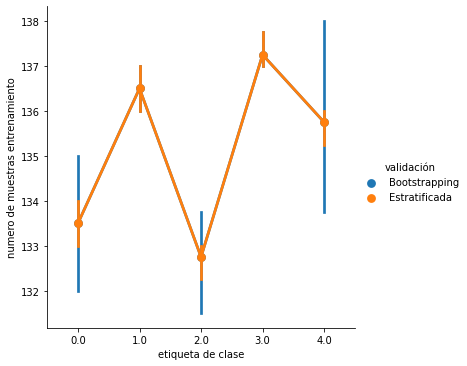

In [ ]:
display("distribución de clases")
sns.catplot(data= cvs , x = 'etiqueta de clase', y='numero de muestras entrenamiento', kind='point', hue='validación')

In [ ]:
#@title Pregunta Abierta
#@markdown  ¿con base en los resultados anteriores y al tipo de problema, qué tecnica de validación es más adecuada? justifique.
respuesta_1 = "\xB4\"Seg\\xFAn los resultados que arroja tanto el grafico como la tabla de datos , y teniendo en cuenta que es un modelo de clasificaci\\xF3n la t\\xE9cnica mas adecuada es la Estratificada. La gr\xE1fica propociona la informaci\xF3n de la tendencia central de las varibales de acuerdo a las posiciones de los puntos y tambi\xE9n propociona alguna indicaci\xF3n de la incertidumbre en torno a la estimaci\xF3n mediante barras de error. De acuerdo a esta informaci\xF3n la validaci\xF3n Estratificada contiene barras de error mucho menores que las de Bootstrapping por lo que es m\xE1s adecuada. \"" #@param {type:"string"}

### Ejercicio 2: Mezclas de gaussinas

En la siguiente celda vamos a definir una función que tome como entradas una matriz $X$ y una matriz $Y$, entrene un modelo GMM  (Modelo de mezclas gaussianas) por cada clase y retorne el listado de modelos para cada clase. Debe consultar todo lo relacionado con la creación, entrenamiento y uso en predicción de este modelo usando la librería scikit-learn. Consultar aquí: http://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

En el notebook, ya se encuentra cargada la libreria que vamos a usar:

```python
from sklearn.mixture import GaussianMixture
```


In [ ]:
#ejercicio de código
def GMMClassifierTrain(X,Y,M,tipo):
    """metodo para entrenar un modelo de mezclas de gausianas
    X: Matriz de caracteristicas
    Y : Matriz con las clases
    M: Número de componentes
    tipo (str): Tipo de matriz de covarianza (los parametros que se
          aceptan son los nombres de la  misma libreria:
          'full', 'tied', 'diag', 'spherical')
    retorna: diccionario de con la estructura:
        {etiqueta_clase: modelo_gmm_entrenado}
    """ 
    GMMs = {}
    for cl in np.unique(Y):
        xclass = X[Y==cl, :]
        gmm  = GaussianMixture(n_components=1, covariance_type=tipo)
        GMMs[cl] = gmm.fit(xclass)
    #Debe retornar un objeto que contenga todos los modelos entrenados  
    return GMMs 


In [ ]:
## la funcion que prueba tu implementacion
GRADER.run_test("ejercicio2", GMMClassifierTrain)

TEST EXITOSO!


Adicionalmente construya una función que use los modelos entrenados en la función anterior para hacer la clasificación de un conjunto nuevo de muestras.


In [ ]:
#ejercicio de código
def GMMClassfierVal(GMMs,Xtest):
    """funcion que recibe los modelos GMM entrenados
        y realiza predicciones con base a cada salida
    GMMs: diccionario de con la estructura:
        {etiqueta_clase: modelo_gmm_entrenado}
    Xtest: matriz numpy con el cojunto de datos
        de las caracteristicas de prueba/test
    retorna: 
    - un numpy array con las estimaciones de de clase de cada 
        una de las muestras de Xtest
    - matriz las probabilidades(en log) de cada clase por cada
      muestra debe tener un shape [numero de muestras, numero de clases]
    """
    prob = np.zeros((Xtest.shape[0], len(GMMs)))
    
    #pista explora los metodos de la libreria, que metodo retorna probabilidades?
    for k,v in GMMs.items():
      i=v.score_samples(Xtest)
      prob[:,k]=i.reshape((len(i),))
    # la etiqueta la asignas seleccionando le maximo de probabilidad
      Yest= np.argmax(prob,axis=1)

    return Yest, prob

In [ ]:
## la funcion que prueba tu implementacion
#ignora las graficas!!
GRADER.run_test("ejercicio3", GMMClassfierVal)

TEST EXITOSO!


### Ejercicio 3: Experimentos
Con el código completado, vamos a realizar experimentos. Complete la siguiente función para poder obtener los resultados de los experimentos. Es necesario:
1. retornar errores de entrenamiento y pruebas
2. retornar intervalos de confianza (desviacion estandar) para cada una de la configuración de experimentos
3. en el código, ya se sugiere la metodologia de validación (usando 4 folds) y se usa, como es usual el standard scaler para normalizar los datos.

In [ ]:
#ejercicio de código
def experimentar(covariance_types,num_components, X, Y):
    """función que realiza experimentos del GMM
    covariance_types: list[str] con las matrices de covarianza a probar
    num_components: list[int] con el numero de componente a probar
    X: matriz con las caractersiticas
    Y: matriz de numpy con etiquetas
    retorna: dataframe con:
        - matriz de covarianza
        - numero de componentes
        - eficiencia de entrenamiento
        - desviacion de estandar eficiencia de entrenamiento
        - eficiencia de prueba
        - desviacion estandar eficiencia de prueba
    """
    folds = 3
    skf = StratifiedKFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0

    for cov_tipo in covariance_types:
        for M in num_components:
            ## para almacenar los errores intermedios
            EficienciaTrain = []
            EficienciaVal = []
            for train, test in skf.split(X, Y):
                Xtrain = X[train,:]
                Ytrain = Y[train]
                Xtest = X[test,:]
                Ytest = Y[test]
                #Normalizamos los datos
                scaler = StandardScaler()
                scaler.fit(Xtrain)
                Xtrain= scaler.transform(Xtrain)
                Xtest = scaler.transform(Xtest)
                #Haga el llamado a la función para crear y entrenar el modelo usando los datos de entrenamiento
                gmms = GMMClassifierTrain(X,Y,num_components,cov_tipo)
                #Validación se ignora la matriz de probabilidad
                Ytrain_pred, _ = GMMClassfierVal(gmms,Xtrain)
                Yest, _ = GMMClassfierVal(gmms,Xtest)
                #Evaluamos las predicciones del modelo con los datos de test
                EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
                EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))

            resultados.loc[idx,'matriz de covarianza'] = cov_tipo
            resultados.loc[idx,'numero de componentes'] = M
            resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
            resultados.loc[idx,'desviacion estandar entrenamiento'] =np.std(EficienciaTrain)
            resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
            resultados.loc[idx,'desviacion estandar prueba'] = np.std(EficienciaVal)
            idx= idx +1
            print("termina para", cov_tipo, M)
        
    return (resultados)

In [ ]:
## la funcion que prueba tu implementacion
# los prints del test los puedes ignorar (se hacen unos checks!)
GRADER.run_test("ejercicio4", experimentar)

termina para full 1
termina para full 2
termina para full 3
termina para tied 1
termina para tied 2
termina para tied 3
termina para diag 1
termina para diag 2
termina para diag 3
termina para spherical 1
termina para spherical 2
termina para spherical 3
TEST EXITOSO!


Ahora vamos a ejecutar nuestros experimentos:

In [ ]:
matrices = ['full', 'tied', 'diag', 'spherical']
componentes = [1,2,3,4,5]
resultados = experimentar(matrices, componentes, x, y)

termina para full 1
termina para full 2
termina para full 3
termina para full 4
termina para full 5
termina para tied 1
termina para tied 2
termina para tied 3
termina para tied 4
termina para tied 5
termina para diag 1
termina para diag 2
termina para diag 3
termina para diag 4
termina para diag 5
termina para spherical 1
termina para spherical 2
termina para spherical 3
termina para spherical 4
termina para spherical 5


In [ ]:
# para ver la tabla
resultados

,matriz de covarianza,numero de componentes,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,desviacion estandar prueba
0,full,1.0,1.000000,0.000000,1.000000,0.000000
1,full,2.0,1.000000,0.000000,1.000000,0.000000
2,full,3.0,1.000000,0.000000,1.000000,0.000000
3,full,4.0,1.000000,0.000000,1.000000,0.000000
4,full,5.0,1.000000,0.000000,1.000000,0.000000
5,tied,1.0,1.000000,0.000000,1.000000,0.000000
6,tied,2.0,1.000000,0.000000,1.000000,0.000000
7,tied,3.0,1.000000,0.000000,1.000000,0.000000
8,tied,4.0,1.000000,0.000000,1.000000,0.000000
9,tied,5.0,1.000000,0.000000,1.000000,0.000000


In [ ]:
#@title Pregunta Abierta
#@markdown La tabla incluye un tipo de matriz de covarianza no vista en clase, Atada(tied), ¿En qué consiste este tipo de matriz según la documentación en scikit-learn?
respuesta_2 = "\"La matriz tied de covarianza contiene un tama\\xF1o de caracter\\xEDsticas*caracter\\xEDsticas. Adem\\xE1s es una matriz de covarianza ligada y en la mayor\xEDa de los casos es un resultado ideal para el modelo por la eficiencia que se obtiene en el entrenamiento o en medidas de desempe\xF1o como Accuracy.\"" #@param {type:"string"}

In [ ]:
#@title Pregunta Abierta
#@markdown ¿Qué método se utilizó para la incialización de los parámetros del modelo GMM? ¿Cual es la diferencia entre el usado y la otra opción de la libreria?
respuesta_3 = "\"El m\\xE9todo utilizado para la inicializaic\\xF3n de los par\\xE1metros del modelo es GMM es kmeans. En la funci\\xF3n GaussianMixture se contiene la inicializaci\\xF3n por defecto con kmeans, la otra opci\\xF3n es random donde las responsabilidades se inicializan aleatoriamente (pesos, medias y precisiones).\"" #@param {type:"string"}

### Ejercicio 4 Kmeans y experimentos


Consultar todo lo relacionado al llamado del método KMeans de la librería scikit-learn en el siguiente enlace: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html. 

En el notebook, ya se encuentra cargada la libreria:

```python
from sklearn.cluster import KMeans
```

Vamos a resolver el mismo problema anterior pero con el K-means. La libreria nos ofrece suficiente utilidad para ya poder comenzar a realizar experimentos con ella. 

Por ellos vamos a implementar la función para realizar los experimentos. [Debemos configurar la inicialización del algoritmo](https://scikit-learn.org/stable/modules/clustering.html#k-means) usando 'k-means++'



In [ ]:
#ejercicio de código
#Validamos el modelo
def experimentar_kmeans(numero_clusters,X, Y):
    """función que realiza experimentos de Kmeans
    numero_clusters: list[int] numero cluster para realizar experimentos
    X: matriz con las caractersiticas
    Y: matriz de numpy con etiquetas
    retorna: dataframe con:
        - numero_clusters
        - el error de entrenamiento
        - desviacion de estandar del error entrenamiento
        - error de prueba
        - desviacion estandar eror de prueba
    """
    folds = 4
    skf = StratifiedKFold(n_splits=folds)
    resultados = pd.DataFrame()
    idx = 0

    for n_cluster in numero_clusters:
        ## para almacenar los errores intermedios
        EficienciaTrain = []
        EficienciaVal = []
        for train, test in skf.split(X, Y):
            Xtrain = X[train,:]
            Ytrain = Y[train]
            Xtest = X[test,:]
            Ytest = Y[test]
            #Normalizamos los datos
            scaler = StandardScaler()
            scaler.fit(Xtrain)
            Xtrain = scaler.transform(Xtrain)
            Xtest = scaler.transform(Xtest)
            #verifica como pasar n_cluster a KMeans
            kmeans = KMeans(n_clusters=n_cluster,init='k-means++')
            #¿que metodo debes llamar para entrenar kmeans?
            kmeans.fit(Xtrain)
            #predicciones en cada conjunto
            # ¿que metodo debes llamar para realizar preddiciones con kmeans?
            Ytrain_pred = kmeans.predict(Xtrain)
            Yest  = kmeans.predict(Xtest)
            #Evaluamos las predicciones del modelo con los datos de test
            EficienciaTrain.append(np.mean(Ytrain_pred.ravel() == Ytrain.ravel()))
            EficienciaVal.append(np.mean(Yest.ravel() == Ytest.ravel()))

        resultados.loc[idx,'numero de clusters'] = n_cluster
        resultados.loc[idx,'eficiencia de entrenamiento'] = np.mean(EficienciaTrain)
        resultados.loc[idx,'desviacion estandar entrenamiento'] = np.std(EficienciaTrain)
        resultados.loc[idx,'eficiencia de prueba'] = np.mean(EficienciaVal)
        resultados.loc[idx,'desviacion estandar prueba'] = np.std(EficienciaVal)
        idx= idx +1
        print("termina para", n_cluster)
        
    return (resultados)

In [ ]:
#@title Default title text
## la funcion que prueba tu implementacion
#ignora las graficas!!
GRADER.run_test("ejercicio5", experimentar_kmeans)

termina para 1
termina para 2
termina para 3
TEST EXITOSO!


In [ ]:
# ejecuta los experimentos y ve los resultados
resultados_kmeans = experimentar_kmeans([3,5,6,8],x, y)
resultados_kmeans

termina para 3
termina para 5
termina para 6
termina para 8


,numero de clusters,eficiencia de entrenamiento,desviacion estandar entrenamiento,eficiencia de prueba,desviacion estandar prueba
0,3.0,0.157633,0.078962,0.145315,0.075482
1,5.0,0.177912,0.085838,0.236450,0.074316
2,6.0,0.261595,0.055162,0.261853,0.040458
3,8.0,0.137204,0.103378,0.134435,0.112727


In [ ]:
#@title Pregunta Abierta
#@markdown  ¿Tiene sentido realizar experimentos con una configuraración de n_clusters!=5? justifique 
respuesta_4 = "Realmente no tiene sentido realizar expermientos con la configuraci\xF3n del n\xFAmero de clusters diferente de 5, ya que el problema contiene un n\xFAmero total de 5 caracter\xEDsticas, que son los n\xFAmeros digitados 0,1,2,3 y 4. " #@param {type:"string"}

tener presente que tipo de entrenamiento realiza el kmeans: ¿supervisado o no supervisado? 

Vamos a realizar una grafica usando un metodo que vamos a ver en futuros laboratorios.

La grafica se pueden entender como una representación en 2 dimensiones de nuestra base de datos (que tiene 40 variables). 

Cada punto representa uno de nuestros ejemplos.

**Recordar**: 
1. Completa el codigo, con el numero de clusters con la cual se obtuvo la mejor eficiencia en los experimentos.
2. Completa el codigo con los mejores parametros para GMM.

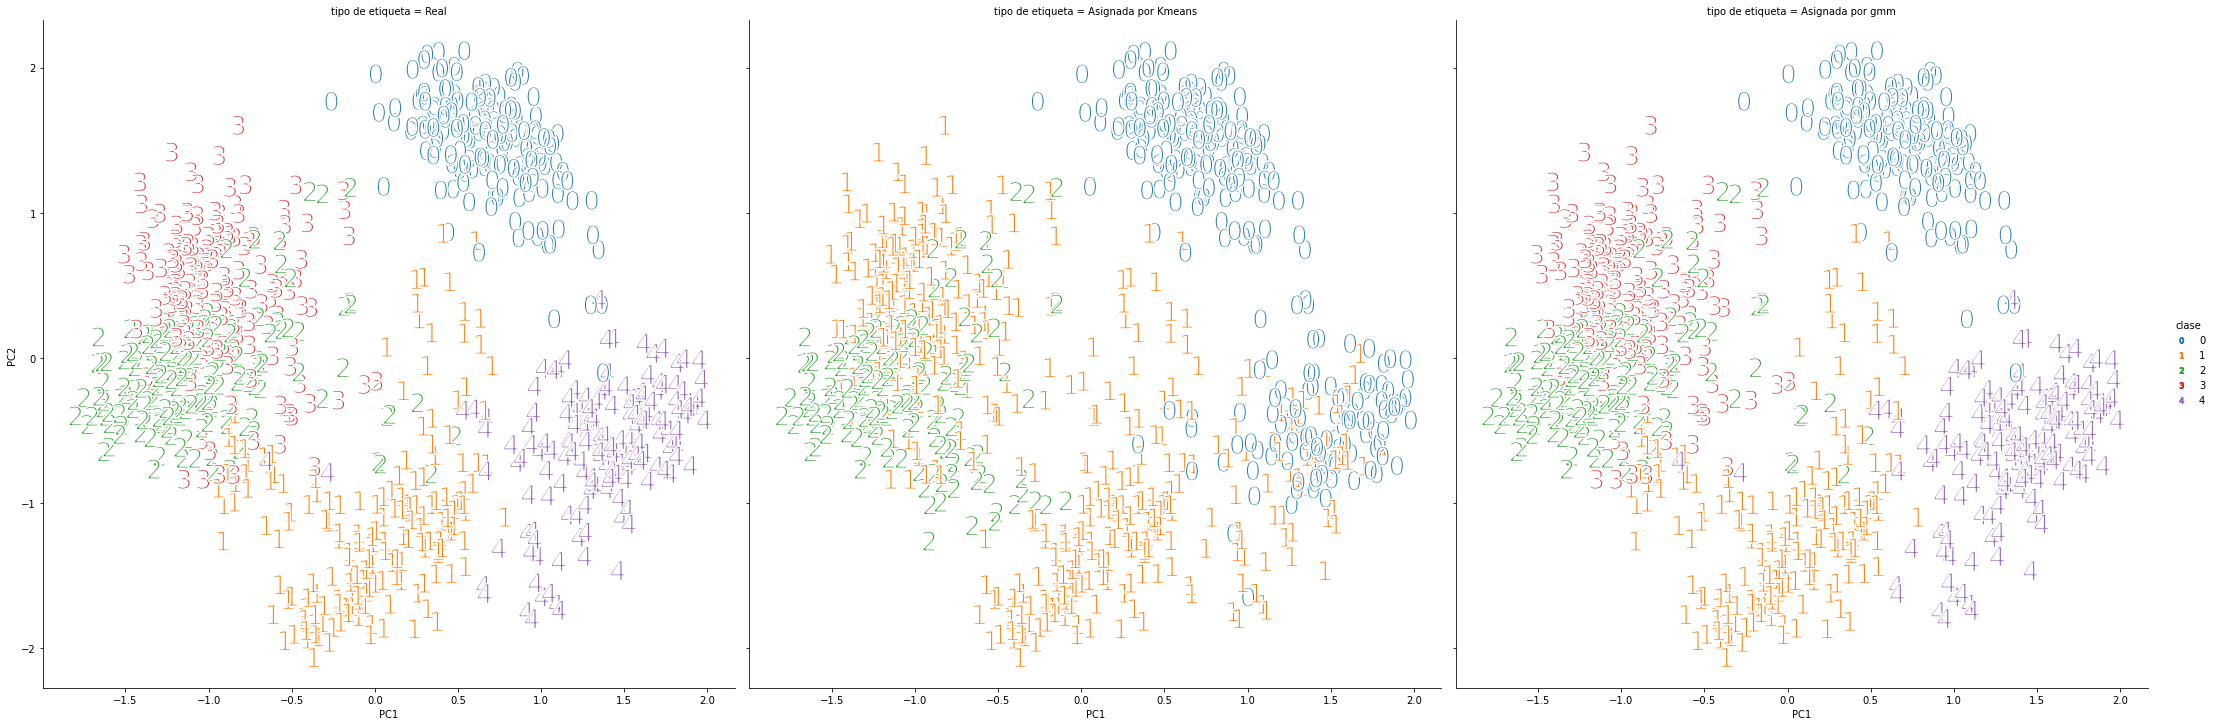

In [ ]:
# estandarizacion

x_std = StandardScaler().fit_transform(x)

## Kmeans
numero_clusters = 3
 # aca el numero de cluster con la mejor eficiencia

predict_kmeans = KMeans(n_clusters=numero_clusters, init = 'k-means++').fit_predict(x_std)

## GMM. Reemplaza los valores de acuerdo a tus experimentos
gmms = GMMClassifierTrain(X=x_std,Y=y,M=5,tipo='tied' )
# ignoramos probabilidad
predict_gmm, _ = GMMClassfierVal(gmms, x_std)

#adicionamos etiquetas reales
real = pd.DataFrame(x[:, 0:2], columns=['PC1', 'PC2'])
real['clase'] = y
real['tipo de etiqueta'] = 'Real'

#adicionamos etiquetas de kmeans
kmeans = pd.DataFrame(x[:, 0:2], columns=['PC1', 'PC2'])
kmeans['clase'] = predict_kmeans
kmeans['tipo de etiqueta'] = 'Asignada por Kmeans'

#adicionamos etiquetas de gmms
gmm_df = pd.DataFrame(x[:, 0:2], columns=['PC1', 'PC2'])
gmm_df['clase'] = predict_gmm
gmm_df['tipo de etiqueta'] = 'Asignada por gmm'

# unimos y graficamos
data_to_plot = pd.concat([real, kmeans, gmm_df], ignore_index=True)
data_to_plot['clase'] = data_to_plot['clase'].astype('category')
g = sns.relplot(data = data_to_plot, x = 'PC1', y='PC2', hue= 'clase', col='tipo de etiqueta', style= 'clase',   markers = ['$0$', '$1$', '$2$', '$3$', '$4$'], s = 400, height = 10)

In [ ]:
#@title Pregunta Abierta
#@markdown  ¿con base a los resultados que modelo es el más adecuado entre el k-means y el GMM? justifique.
respuesta_5 = "El modelo m\xE1s adecuado seg\xFAn los resultados obtenidos en las experimentaciones es el GMM, en las tablas se muestran las eficiencias de los entrenamientos, donde el modelo GMM obtiene valores entre 1.00 y 0.97, lo cual refleja una efectividad ideal para cualquier problema. Adem\xE1s la desviaci\xF3n en GMM es mucho menor que la de k-means lo que refleja un modelo m\xE1s estable que evita el sobreajuste (relacionado con el error de varianza)." #@param {type:"string"}

In [ ]:
GRADER.check_tests()

Todo se ve ok. Asegurate de responder las preguntas abiertas y envia le archivo al formulario ¡buen trabajo!


In [ ]:
#@title Integrantes
codigo_integrante_1 ='1000415078' #@param {type:"string"}
codigo_integrante_2 = '1035833769'  #@param {type:"string"}

----
esta linea de codigo va fallar, es de uso exclusivo de los profesores


In [ ]:
GRADER.grade()

uso del docente
